# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,NaN,NaN,Unknown,Ukraine,2021-01-02 05:22:33,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4007,NaN,NaN,NaN,Nauru,2021-01-02 05:22:33,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4008,NaN,NaN,Niue,New Zealand,2021-01-02 05:22:33,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4009,NaN,NaN,NaN,Tuvalu,2021-01-02 05:22:33,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [3]:
df.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


#### Show the information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


#### Show the sum of missing values of features in the dataset

In [6]:
df.isnull().sum()

FIPS                   746
Admin2                 741
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [47]:
df.groupby('Country_Region').agg({'Confirmed':'sum'})

,Confirmed
Country_Region,
Afghanistan,52513
Albania,58316
Algeria,99897
Andorra,8117
Angola,17568
...,...
West Bank and Gaza,139223
Winter Olympics 2022,0
Yemen,2101


#### Show the number of Deaths by Country

In [48]:
df.groupby('Country_Region').agg({'Deaths':'sum'})

,Deaths
Country_Region,
Afghanistan,2201
Albania,1181
Algeria,2762
Andorra,84
Angola,405
...,...
West Bank and Gaza,1418
Winter Olympics 2022,0
Yemen,610


#### Show the number of Recovered cases by Country

In [49]:
df.groupby('Country_Region').agg({'Recovered':'sum'})

,Recovered
Country_Region,
Afghanistan,41727
Albania,33634
Algeria,67395
Andorra,7463
Angola,11146
...,...
West Bank and Gaza,118926
Winter Olympics 2022,0
Yemen,1396


#### Show the number of Active Cases by Country

In [51]:
df_active = df.iloc[:, [3,10]]
df_active.groupby('Country_Region').agg({'Active':'sum'})

,Active
Country_Region,
Afghanistan,8585
Albania,23501
Algeria,29740
Andorra,570
Angola,6017
...,...
West Bank and Gaza,18879
Winter Olympics 2022,0
Yemen,95


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [52]:
df.groupby('Country_Region').agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active':'sum'})

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,52513,2201,41727,8585
Albania,58316,1181,33634,23501
Algeria,99897,2762,67395,29740
Andorra,8117,84,7463,570
Angola,17568,405,11146,6017
...,...,...,...,...
West Bank and Gaza,139223,1418,118926,18879
Winter Olympics 2022,0,0,0,0
Yemen,2101,610,1396,95


### Question 3

### Show the countries with no recovered cases

In [56]:
df_recov = df.groupby('Country_Region').agg({'Recovered':'sum'})
df_recov[df_recov['Recovered']==0]

,Recovered
Country_Region,
Antarctica,0
Belgium,0
Kiribati,0
"Korea, North",0
Nauru,0
Palau,0
Serbia,0
Summer Olympics 2020,0
Sweden,0


#### Show the countries with no confirmed cases

In [57]:
df_nconf = df.groupby('Country_Region').agg({'Confirmed':'sum'})
df_nconf[df_nconf['Confirmed']==0]

,Confirmed
Country_Region,
Antarctica,0
Kiribati,0
"Korea, North",0
Nauru,0
Palau,0
Summer Olympics 2020,0
Tonga,0
Tuvalu,0
Winter Olympics 2022,0


#### Show the countries with no deaths

In [58]:
df_ndeaths = df.groupby('Country_Region').agg({'Deaths':'sum'})
df_ndeaths[df_ndeaths['Deaths']==0]


,Deaths
Country_Region,
Antarctica,0
Bhutan,0
Cambodia,0
Dominica,0
Grenada,0
Holy See,0
Kiribati,0
"Korea, North",0
Laos,0


In [45]:
df_all.loc[df['Deaths'] == 0]

,Country_Region,Confirmed,Deaths,Recovered,Active
10,Australia,75,0,71,4
23,Belgium,79680,0,0,79680
24,Belgium,81557,0,0,81557
25,Belgium,65260,0,0,65260
26,Belgium,49270,0,0,49270
...,...,...,...,...,...
4006,Ukraine,0,0,0,0
4007,Nauru,0,0,0,0
4008,New Zealand,0,0,0,0
4009,Tuvalu,0,0,0,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [60]:
df.groupby('Country_Region').agg({'Last_Update':'max', 'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active':'sum'}).sort_values('Confirmed', ascending=False)[:10]



,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
US,2021-04-02 15:13:53,20398850,352747,0,19978335
India,2021-01-02 05:22:33,10305788,149218,9929568,273109
Brazil,2021-01-02 05:22:33,7703971,195541,6855372,649795
Russia,2021-01-02 05:22:33,3153960,56798,2553467,543695
France,2021-01-02 05:22:33,2697014,64891,200822,2431301
United Kingdom,2021-01-02 05:22:33,2549671,95917,5682,2469774
Turkey,2021-01-02 05:22:33,2220855,21093,2114760,85002
Italy,2021-01-02 05:22:33,2129376,74621,1479988,574767
Spain,2021-01-02 05:22:33,1928265,50837,150376,1727052


#### Show the Top 10 Countries with Active cases

In [61]:
df.groupby('Country_Region').agg({'Last_Update':'max', 'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active':'sum'}).sort_values('Active', ascending=False)[:10]


,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
US,2021-04-02 15:13:53,20398850,352747,0,19978335
United Kingdom,2021-01-02 05:22:33,2549671,95917,5682,2469774
France,2021-01-02 05:22:33,2697014,64891,200822,2431301
Spain,2021-01-02 05:22:33,1928265,50837,150376,1727052
Mexico,2021-01-02 05:22:33,1437185,126507,1083768,1310678
Peru,2021-01-02 05:22:33,1015137,93231,951318,921906
Netherlands,2021-01-02 05:22:33,816616,11624,9651,795341
Brazil,2021-01-02 05:22:33,7703971,195541,6855372,649795
Belgium,2021-01-02 05:22:33,648289,19581,0,637588


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [63]:
import matplotlib.pyplot as plt

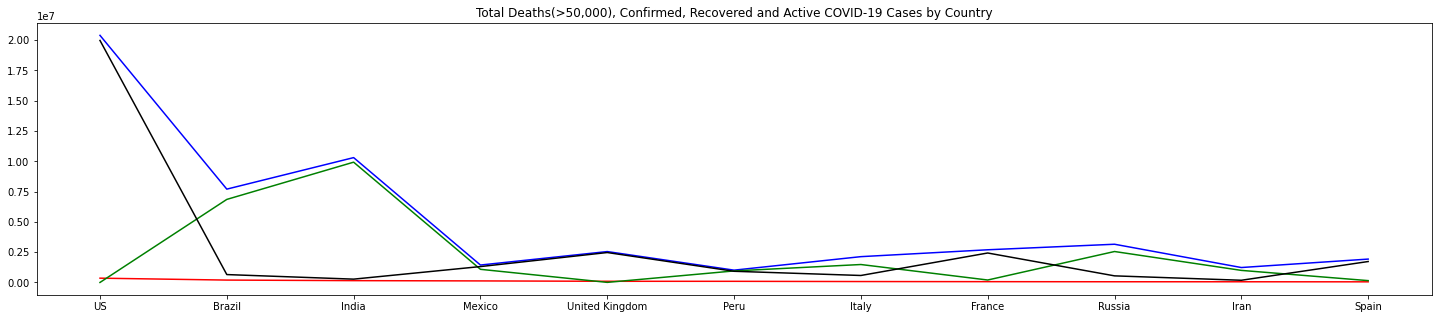

In [65]:
df_plot = df.groupby('Country_Region').agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active':'sum'}).sort_values('Deaths', ascending=False).reset_index()
df_plot = df_plot[df_plot["Deaths"] > 50000]
plt.figure(figsize=(25, 5))
plt.plot(df_plot['Country_Region'], df_plot['Deaths'],color='red')
plt.plot(df_plot['Country_Region'], df_plot['Confirmed'],color='blue')
plt.plot(df_plot['Country_Region'], df_plot['Recovered'], color='green')
plt.plot(df_plot['Country_Region'], df_plot['Active'], color='black')
plt.title('Total Deaths(>50,000), Confirmed, Recovered and Active COVID-19 Cases by Country')
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [67]:
import plotly.express as px

In [68]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [69]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [73]:
df_usa = covid_data[covid_data['Country_Region']=='US']
df1 = df_usa.groupby(['Province_State'])['Deaths'].sum().reset_index()
fig = px.bar(df1, x='Province_State', y='Deaths', title='State wise deaths in USA')
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [71]:
df7 = df_usa.groupby(['Province_State'])['Active'].sum().reset_index()
fig = px.bar(df7, x='Province_State', y='Active', title='State wise Active in USA', text='Active')
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [75]:
df8 = df_usa.groupby(['Province_State'])['Confirmed'].sum().reset_index()
fig = px.bar(df8, x='Province_State', y='Confirmed', title='State wise Confirmed cases in USA', text='Confirmed')
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [76]:
import plotly.express as px
import plotly.io as pio

In [77]:
df9 = covid_data.loc[: ,['Last_Update', 'Confirmed']].groupby('Last_Update').sum().reset_index()
px.line(df9, x='Last_Update', y='Confirmed', title = 'Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time')